**UNIVERSIDADE FEDERAL DA PARAÍBA** \
**CENTRO DE CIÊNCIAS SOCIAIS APLICADAS**\
**CIÊNCIA DE DADOS PARA NEGÓCIOS** 

# **Ferramenta de Aprendizagem Supervisionada para Previsão de eleição de Candidatos a Vereador das Câmaras Municipais do Estado da Paraíba**


## **1. Descrição**
Este projeto visa desenvolver uma ferramenta analítica a destinada a prever a elegibilidade de candidatos a vereador nas câmaras municipais da Paraíba. Utilizando algoritmos de aprendizado de máquina e análise de dados, a ferramenta analisa uma ampla gama de variáveis, tanto pessoais quanto contextuais.

## **2. Obtendo Dados do TSE**
- 2.1 Extraindo os dados dos Candidatos e Votos por Secção de 2020 da PB

In [1]:
import requests
import zipfile
from io import BytesIO
import os

def download_and_extract(url, specific_file=None):
    response = requests.get(url)
    if response.status_code == 200:
        print(f'Download concluído com sucesso para {url}')
        with zipfile.ZipFile(BytesIO(response.content)) as the_zip:
            if specific_file and specific_file in the_zip.namelist():
                the_zip.extract(specific_file, '.')  
                print(f'Arquivo {specific_file} extraído com sucesso!')
            else:
                the_zip.extractall('.')
                print('Todos os arquivos foram extraídos com sucesso.')
    else:
        print(f'Erro no download do arquivo de {url}. Status Code: {response.status_code}')

def delete_file(filename):
    
    if os.path.exists(filename):
        os.remove(filename)
        print(f'Arquivo {filename} apagado com sucesso.')
    else:
        print(f'Arquivo {filename} não encontrado.')


urls_and_files = [
    ('https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip', 'consulta_cand_2020_PB.csv')
]

for url, file_to_extract in urls_and_files:
    download_and_extract(url, file_to_extract)


delete_file('leiame.pdf')


Download concluído com sucesso para https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip
Arquivo consulta_cand_2020_PB.csv extraído com sucesso!
Arquivo leiame.pdf não encontrado.


- 2.2 Leitura e Seleção das Variavéis de Interesse da Tabela de Candidatos 

In [1]:
import pandas as pd
#Leitura da tabela consulta candidato e seleção do cargo = Vereador, e dps selecionando somente as variaveis de interesse
data = pd.read_csv("consulta_cand_2020_PB.csv", encoding='latin1', sep=';')
data = data[data['CD_CARGO'] == 13]
data_selecionada = data[['NM_CANDIDATO','NR_PARTIDO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_COR_RACA', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
        'VR_DESPESA_MAX_CAMPANHA', 'DT_NASCIMENTO',
        'DS_SIT_TOT_TURNO','SG_UE']]
data_selecionada

,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE
0,JOSE LEUDO MELQUIADES DE MEDEIROS,10,2,9,1,N,12,81452.82,20/04/1966,SUPLENTE,21172
1,JOSÉ SEVERINO DE SOUZA,51,2,3,1,N,12,164340.55,28/04/1978,NÃO ELEITO,19810
2,JOSE DE ASSIS DA SILVA,55,2,3,3,N,12,12307.75,04/10/1968,SUPLENTE,19070
3,JUDITE DIONÍSIO FIGUEREDO,23,4,1,3,N,12,12307.75,10/08/1975,SUPLENTE,22195
4,JOSE ROBERTO VENTURA BARBOSA,40,2,1,1,N,12,12307.75,20/08/1985,ELEITO POR QP,20001
...,...,...,...,...,...,...,...,...,...,...,...
12613,FRANCISCO WEVERTON DA SILVA FIRMINO,70,2,1,3,N,12,81452.82,21/07/1997,SUPLENTE,21172
12614,JOSÉ MARCELO MARINHO DA SILVA,70,2,3,1,N,12,12307.75,31/05/1988,NÃO ELEITO,20150
12615,ELENA CRISTINA DA SILVA COSTA,10,4,3,4,N,12,12307.75,29/09/1968,ELEITO POR QP,20630
12616,JOSEFA DE LIMA FARIAS,12,4,9,3,N,12,12307.75,10/07/1966,SUPLENTE,22357


- 2.3 Função para identificar se o Candidato foi eleito ou não

In [3]:
#Funcao para verificar se o candidato foi eleito ou nao 
def verificar_eleito(situacao):
    if situacao in ['ELEITO POR QP', 'ELEITO', 'ELEITO POR MÉDIA']:
        return 1
    else:
        return 0

# Criando nova coluna para dizer se o candidato foi eleito 1 e nao eleito 0
data['STATUS_ELEICAO'] = data['DS_SIT_TOT_TURNO'].apply(verificar_eleito)

data

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,STATUS_ELEICAO
0,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0
1,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0
2,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0
3,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0
4,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12613,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0
12614,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0
12615,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,1
12616,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0


- 2.4 Calculando a Idade do Candidato e adicionando a coluna IDADE

In [4]:
from datetime import datetime

data['DT_NASCIMENTO'] = pd.to_datetime(data['DT_NASCIMENTO'], format='%d/%m/%Y')

data_eleicao = datetime(2020, 11, 15)

data['IDADE'] = data['DT_NASCIMENTO'].apply(lambda x: (data_eleicao - x).days // 365)
data

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,STATUS_ELEICAO,IDADE
0,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,54
1,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,42
2,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,52
3,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,45
4,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12613,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,23
12614,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,32
12615,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,1,52
12616,02/05/2024,00:33:52,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,0,54


- 2.5 Selecionando as variaveis de interesse

In [5]:
# Lista de colunas que quero selecionar
colunas_selecionadas = [
      'NR_PARTIDO', 'CD_GENERO',  'CD_COR_RACA', 'ST_REELEICAO',
        'VR_DESPESA_MAX_CAMPANHA', 'IDADE',
        'STATUS_ELEICAO','SG_UE'

]

data = data[colunas_selecionadas]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 0 to 12617
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NR_PARTIDO               11292 non-null  int64  
 1   CD_GENERO                11292 non-null  int64  
 2   CD_COR_RACA              11292 non-null  int64  
 3   ST_REELEICAO             11292 non-null  object 
 4   VR_DESPESA_MAX_CAMPANHA  11292 non-null  float64
 5   IDADE                    11292 non-null  int64  
 6   STATUS_ELEICAO           11292 non-null  int64  
 7   SG_UE                    11292 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 794.0+ KB


## **3. Tratamento e Normalização dos Dados**

In [6]:
import pandas as pd

def data_transform(df, vscale='minmax'):
    # Convertendo colunas categóricas para string e criando variáveis dummy
    categorical_cols = ['NR_PARTIDO', 'CD_GENERO', 'CD_COR_RACA', 'ST_REELEICAO','SG_UE']
    df[categorical_cols] = df[categorical_cols].astype(str)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Normalização de variáveis numéricas
    stats = []
    numeric_cols = ['VR_DESPESA_MAX_CAMPANHA', 'IDADE']
    for col in numeric_cols:
        if vscale == 'minmax':
            min_val, max_val = df[col].min(), df[col].max()
            df[col] = (df[col] - min_val) / (max_val - min_val)
            stats.append({col: [min_val, max_val]})
        else:
            mean_val, std_val = df[col].mean(), df[col].std()
            df[col] = (df[col] - mean_val) / std_val
            stats.append({col: [mean_val, std_val]})

    df = df.dropna()

    return df, stats

df, stats = data_transform(df=data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 0 to 12617
Columns: 262 entries, VR_DESPESA_MAX_CAMPANHA to SG_UE_22438
dtypes: float64(2), int64(1), uint8(259)
memory usage: 3.1 MB


C:\Users\josed\AppData\Local\Temp\ipykernel_71648\547618467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].astype(str)


In [7]:
stats

[{'VR_DESPESA_MAX_CAMPANHA': [-1.0, 311995.58]}, {'IDADE': [18, 101]}]

## **4. Aplicando o modelo Logit**

In [8]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Partição de treino e teste
y = df['STATUS_ELEICAO']
X = df.drop('STATUS_ELEICAO', axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=1)

model = LogisticRegression(random_state=1).fit(X_train, y_train)
model.score(X_test, y_test)


0.8105076741440378

In [9]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
from sklearn import metrics

# Matriz de Confusão
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion_mat)

# Acurácia
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Precisão
precision = metrics.precision_score(y_test, y_pred, average='macro') 
print("Precisão:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='macro')  
print("Recall:", recall)

# F1-score
f1 = metrics.f1_score(y_test, y_pred, average='macro')  
print("F1-score:", f1)


Matriz de Confusão:
 [[2602   98]
 [ 544  144]]
Acurácia: 0.8105076741440378
Precisão: 0.7110616656071201
Recall: 0.5865030146425495
F1-score: 0.5999293699579531


In [11]:
X

,VR_DESPESA_MAX_CAMPANHA,IDADE,NR_PARTIDO_11,NR_PARTIDO_12,NR_PARTIDO_13,NR_PARTIDO_14,NR_PARTIDO_15,NR_PARTIDO_16,NR_PARTIDO_17,NR_PARTIDO_18,...,SG_UE_22250,SG_UE_22276,SG_UE_22292,SG_UE_22314,SG_UE_22330,SG_UE_22357,SG_UE_22373,SG_UE_22390,SG_UE_22411,SG_UE_22438
0,0.261073,0.433735,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.526742,0.289157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.039452,0.409639,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.039452,0.325301,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.039452,0.204819,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12613,0.261073,0.060241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12614,0.039452,0.168675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12615,0.039452,0.409639,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12616,0.039452,0.433735,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X.columns

Index(['VR_DESPESA_MAX_CAMPANHA', 'IDADE', 'NR_PARTIDO_11', 'NR_PARTIDO_12',
       'NR_PARTIDO_13', 'NR_PARTIDO_14', 'NR_PARTIDO_15', 'NR_PARTIDO_16',
       'NR_PARTIDO_17', 'NR_PARTIDO_18',
       ...
       'SG_UE_22250', 'SG_UE_22276', 'SG_UE_22292', 'SG_UE_22314',
       'SG_UE_22330', 'SG_UE_22357', 'SG_UE_22373', 'SG_UE_22390',
       'SG_UE_22411', 'SG_UE_22438'],
      dtype='object', length=261)

In [13]:
# Visualização dos parâmetros estimados
print(model.intercept_)
model.coef_

[-0.44252986]


array([[-1.56499259, -0.17527042,  0.41134091, -0.27193162, -1.59823784,
        -0.08921307, -0.33830028,  0.        , -1.08947601, -0.93483816,
         0.0834223 , -0.30599548,  0.19396817,  0.0211976 ,  0.04593341,
        -0.75298354, -1.16165976,  0.        ,  0.28530529, -0.10423808,
        -0.27750039, -0.18359582, -0.93933719,  0.01786178, -1.53401488,
        -1.35001511,  0.28946397, -0.86716104, -0.04510026, -0.84252288,
        -0.36314386, -0.63671633, -1.21698944, -0.62617038, -0.25303204,
        -0.14120424, -0.40767344, -0.46049185,  1.8123987 , -0.05234545,
        -0.08435735,  0.87794868,  0.30566806, -1.18992049, -0.86623427,
        -0.76277486, -1.16363528,  0.03031959, -0.07486142, -1.26360635,
        -0.47499221,  0.01153599,  0.55354076, -0.02838302,  0.28416168,
        -0.1216815 ,  1.02552112,  0.48072029,  0.93843595, -0.55431237,
         0.58542514,  0.12495086,  0.65771688, -0.5285061 , -0.26493193,
        -0.02184629,  0.32256526, -0.9153527 ,  0.8

In [14]:
from numpy import exp
# Transformação: inversão logit
def inv_logit(coef):
    return exp(coef)/(1+exp(coef))

inv_logit(model.coef_)

array([[0.17293141, 0.45629422, 0.60140936, 0.43243295, 0.16822805,
        0.47771151, 0.41622242, 0.5       , 0.25171696, 0.28194419,
        0.52084349, 0.4240925 , 0.54834058, 0.5052992 , 0.51148133,
        0.32017155, 0.23836583, 0.5       , 0.5708464 , 0.47396405,
        0.4310667 , 0.45422954, 0.28103425, 0.50446533, 0.17740702,
        0.2058679 , 0.5718649 , 0.29584537, 0.48872685, 0.3010037 ,
        0.41019874, 0.34598919, 0.22846669, 0.3483794 , 0.43707735,
        0.46475748, 0.39947012, 0.38686915, 0.85965153, 0.48691663,
        0.47892316, 0.70639696, 0.57582753, 0.23327316, 0.29603848,
        0.31804412, 0.23800736, 0.50757932, 0.48129338, 0.2203537 ,
        0.38343534, 0.50288396, 0.63495668, 0.49290472, 0.57056622,
        0.4696171 , 0.73604665, 0.61791795, 0.71878362, 0.36486449,
        0.64231477, 0.53119714, 0.65874733, 0.37086538, 0.43415172,
        0.49453865, 0.5799493 , 0.28590576, 0.7066855 , 0.73494318,
        0.54380248, 0.47940428, 0.66106734, 0.65

In [15]:
# Impressão dos coeficientes
cols_names = X.columns
name1="Coluna"
name2="Coefficiente"
name3="Probabilidade"
print(f"{name1:10}{name2:10} {name3:10}")
for col, val in sorted(
    zip(cols_names, model.coef_[0]), key=lambda x: x[1], reverse=True):
    
    print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")

Coluna    Coefficiente Probabilidade
SG_UE_21717     2.021      0.883
ST_REELEICAO_S     1.812      0.860
SG_UE_20117     1.369      0.797
SG_UE_19470     1.318      0.789
SG_UE_20338     1.237      0.775
SG_UE_19909     1.205      0.769
SG_UE_20311     1.203      0.769
SG_UE_19836     1.130      0.756
SG_UE_21954     1.125      0.755
SG_UE_19186     1.026      0.736
SG_UE_19313     1.020      0.735
SG_UE_20630     0.991      0.729
SG_UE_19640     0.970      0.725
SG_UE_19380     0.968      0.725
SG_UE_20257     0.946      0.720
SG_UE_20079     0.944      0.720
SG_UE_22330     0.941      0.719
SG_UE_19208     0.938      0.719
SG_UE_22136     0.926      0.716
SG_UE_19453     0.889      0.709
SG_UE_19542     0.885      0.708
SG_UE_19305     0.879      0.707
SG_UE_19038     0.878      0.706
SG_UE_21199     0.864      0.704
SG_UE_21130     0.823      0.695
SG_UE_19402     0.822      0.695
SG_UE_20095     0.811      0.692
SG_UE_21156     0.797      0.689
SG_UE_19410     0.795      0.689
SG_

c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


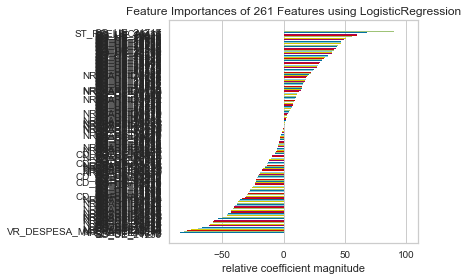

<Axes: title={'center': 'Feature Importances of 261 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [16]:
from yellowbrick.model_selection import FeatureImportances
fig = FeatureImportances(model)
fig.fit(X_train, y_train)
fig.poof()

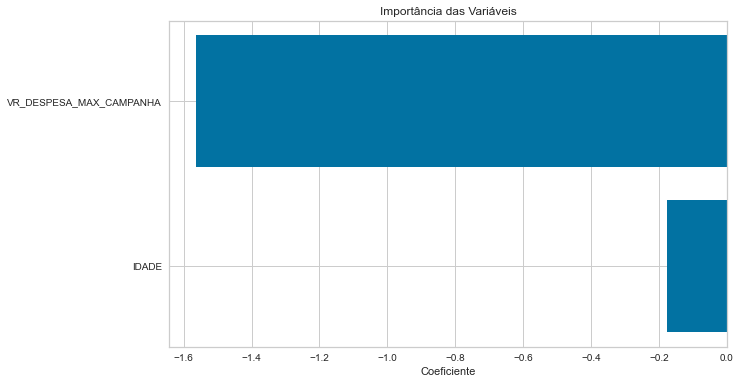

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Obter os coeficientes do modelo treinado
coef = model.coef_[0]
features = X.columns

# Mapeamento das variáveis específicas às suas posições
var_names = ['CD_GENERO', 'CD_COR_RACA', 'ST_REELEICAO', 'VR_DESPESA_MAX_CAMPANHA', 'IDADE']
indices = [list(features).index(v) for v in var_names if v in features]

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), coef[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Coeficiente")
plt.title("Importância das Variáveis")
plt.gca().invert_yaxis()  # Inverte o eixo para ter a mais importante no topo
plt.show()


In [21]:
# Predições
print(X.loc[[0]])
print(model.predict(X.loc[[0]])) # Classe
print(model.predict_proba(X.loc[[0]])) # Probabilidade

   VR_DESPESA_MAX_CAMPANHA     IDADE  NR_PARTIDO_11  NR_PARTIDO_12  \
0                 0.261073  0.433735              0              0   

   NR_PARTIDO_13  NR_PARTIDO_14  NR_PARTIDO_15  NR_PARTIDO_16  NR_PARTIDO_17  \
0              0              0              0              0              0   

   NR_PARTIDO_18  ...  SG_UE_22250  SG_UE_22276  SG_UE_22292  SG_UE_22314  \
0              0  ...            0            0            0            0   

   SG_UE_22330  SG_UE_22357  SG_UE_22373  SG_UE_22390  SG_UE_22411  \
0            0            0            0            0            0   

   SG_UE_22438  
0            0  

[1 rows x 261 columns]
[0]
[[0.87455986 0.12544014]]


In [22]:
r = {
    'metodo': 'logit',
    'resultados': model,
    'escala': stats,
    'acuracia': model.score(X_test, y_test)
}

import pickle
filename = 'modelo_eleicao_municipal.pkl'
pickle.dump(r, open(filename, "wb"))